# Exercises

1. The correlation coefficient, or `r` value, of the variables `pct_bachelors_higher` & `median_hh_income` was about 0.70. Write a query using the same dataset to show the correlation between `pct_masters_higher` & `median_hh_income`. Is the `r` value higher or lower? What might explain the difference?
2. Using the exports data, create a 12-month rolling sum using the values in the column `soybeans_export_value`. Copy & paste the results from the pgAdmin output pane & graph the values with Excel. What trend do you see?
3. Revisit the libraries data in the table `pls_fy2018_libraries`. Rank library agencies based on the rate of visits per 1,000 population (column `popu_lsa`), & limit the query to agencies serving 250,000 people or more.

---

# 1. 

```
SELECT round(corr(median_hh_income,
           pct_bachelors_higher)::numeric, 3)
           AS bachelors_income_r,
       round(corr(median_hh_income,
           pct_masters_higher)::numeric, 3)
           AS masters_income_r
FROM acs_2014_2018_stats;
```

<img src = "Exercise Images/Correlation of Bachelors or Masters Degrees to Income.png" width = "600" style = "margin:auto"/>

The correlation between the percentage of people ages 25 & older whose level of education is a bachelor's degree or higher & the county's median household income is approximately 0.7. The correlation between the percentage of people ages 25 or older whose level of education is a master's degree or higher & the county's median household income is approximately 0.6. Both show positive relationships but the first correlation is stronger. 

The variability in the median household income for people ages 25 & older with a master's degree or higher level of education is higher than that for people ages 25 & older with a bachelor's degree or higher level of education. Also, bachelor's+ encompasses master's+, which might explain the close-ish r values.

# 2.

```
SELECT year, month, soybeans_export_value,
	   sum(soybeans_export_value) OVER (ORDER BY 
	   	   year, month ROWS BETWEEN 11 PRECEDING AND 
		   CURRENT ROW) AS twelve_month_sum
FROM us_exports
ORDER BY year, month;

COPY (
SELECT year, month, soybeans_export_value,
	   sum(soybeans_export_value) OVER (ORDER BY 
	   	   year, month ROWS BETWEEN 11 PRECEDING AND 
		   CURRENT ROW) AS twelve_month_sum
FROM us_exports
ORDER BY year, month
)
TO '/YourDirectory/soybean_exports.csv'
WITH (FORMAT CSV, HEADER);
```

<img src = "Exercise Images/Rolling Sum of Soy Bean Exports.png" width = "600" style = "margin:auto"/>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

soybean = pd.read_csv("soybean_exports.csv")
soybean["year_mon"] = soybean["year"].astype(str) + "-" + soybean["month"].astype(str)
soybean

,year,month,soybeans_export_value,twelve_month_sum,year_mon
0,2002,1,794068114,794068114,2002-1
1,2002,2,659050185,1453118299,2002-2
2,2002,3,345893170,1799011469,2002-3
3,2002,4,246909123,2045920592,2002-4
4,2002,5,247943895,2293864487,2002-5
...,...,...,...,...,...
219,2020,4,783880798,17824259678,2020-4
220,2020,5,704320137,17655226179,2020-5
221,2020,6,645792528,17140704536,2020-6
222,2020,7,793474898,16613660031,2020-7


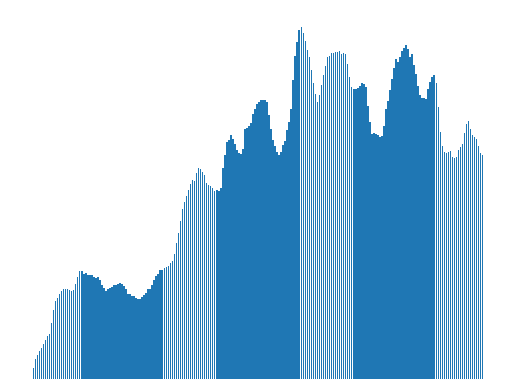

In [2]:
plt.bar(soybean["year_mon"], soybean["twelve_month_sum"])
plt.axis("off")
plt.show()

The rolling sum increases pretty drastically but seems like its slowly bouncing its way back down.

# 3.

```
SELECT stabr, city, county, libname, popu_lsa,
	   rank() OVER (ORDER BY popu_lsa DESC)
FROM pls_fy2018_libraries
WHERE popu_lsa > 250000
ORDER BY popu_lsa DESC;
```

<img src = "Exercise Images/Rank Library Visits.png" width = "600" style = "margin:auto"/>